In [1]:
import os
import pickle
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import cv2 

In [2]:
input_dir = os.getcwd()
categories = ['empty','not_empty']

In [3]:
data = []
labels = []
images = []
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        img = imread(img_path)
        img = resize(img, (30, 30))
        data.append(img.flatten())
        labels.append(category_idx)
        images.append(img)


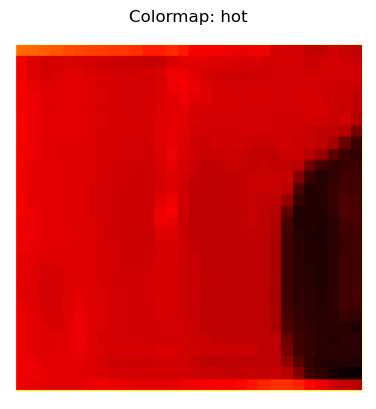

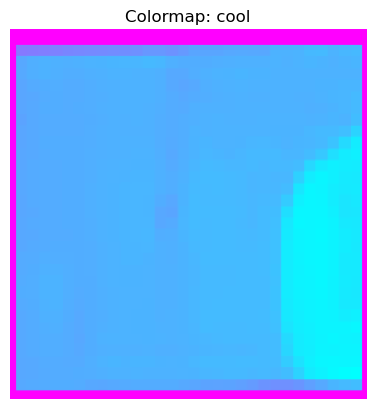

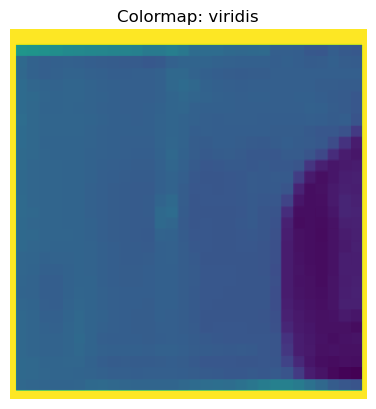

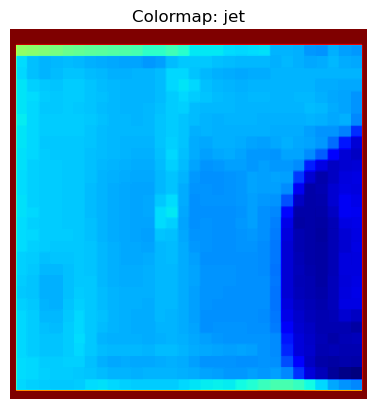

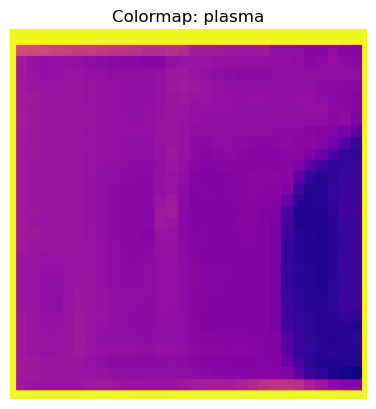

In [4]:
import cv2
import matplotlib.pyplot as plt

# Read the image using OpenCV
image = cv2.imread('image1.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Function to display the image with a given colormap
def display_image_with_colormap(image, colormap):
    plt.imshow(image, cmap=colormap)
    plt.axis('off')  # Hide axes
    plt.title(f'Colormap: {colormap}')
    plt.show()

# Display the grayscale image with different colormaps
colormaps = ['hot', 'cool', 'viridis', 'jet', 'plasma']
for cmap in colormaps:
    display_image_with_colormap(gray_image, cmap)

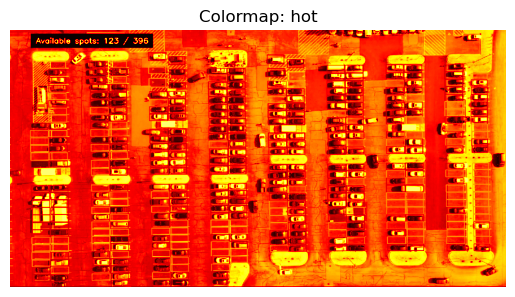

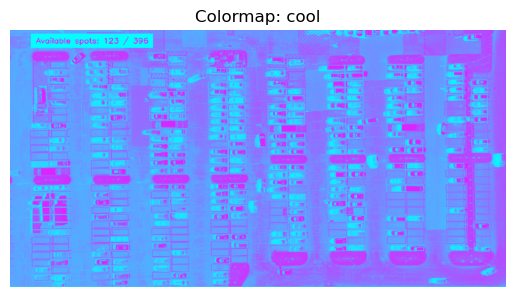

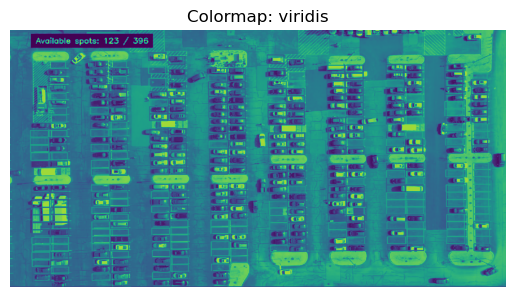

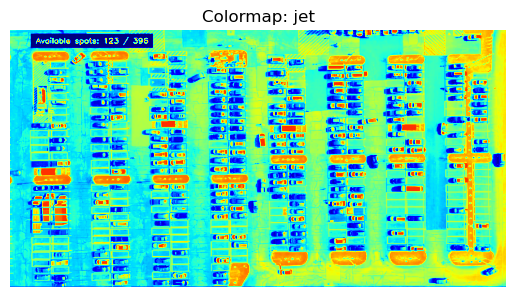

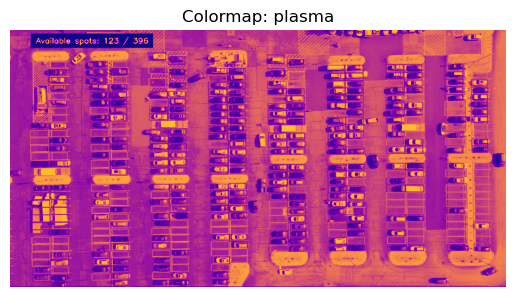

In [5]:
import cv2
import matplotlib.pyplot as plt

# Read the image using OpenCV
image = cv2.imread('image3.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Function to display the image with a given colormap
def display_image_with_colormap(image, colormap):
    plt.imshow(image, cmap=colormap)
    plt.axis('off')  # Hide axes
    plt.title(f'Colormap: {colormap}')
    plt.show()

# Display the grayscale image with different colormaps
colormaps = ['hot', 'cool', 'viridis', 'jet', 'plasma']
for cmap in colormaps:
    display_image_with_colormap(gray_image, cmap)

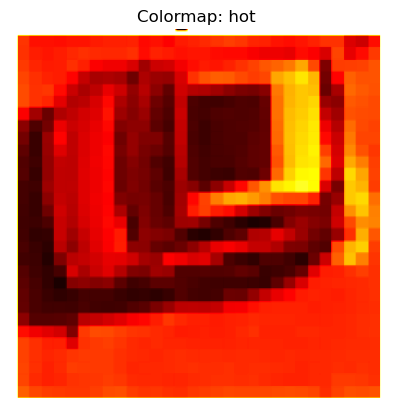

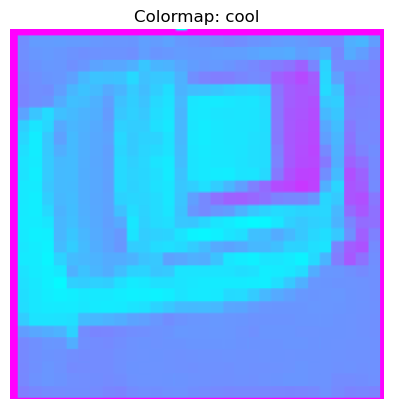

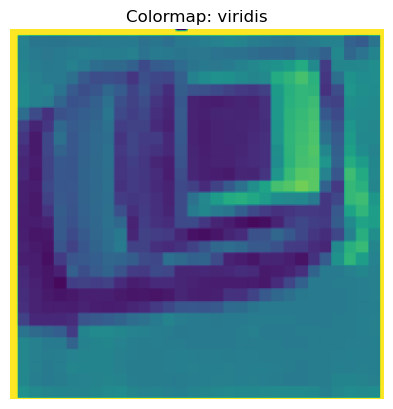

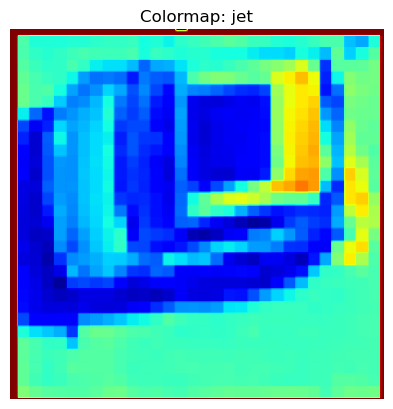

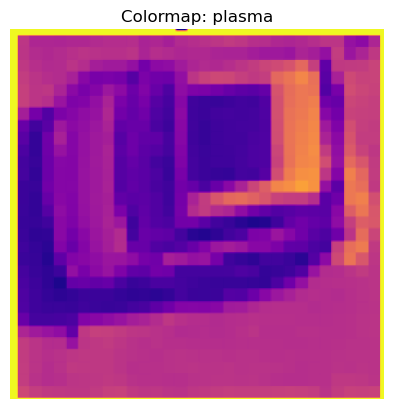

In [6]:
import cv2
import matplotlib.pyplot as plt

# Read the image using OpenCV
image = cv2.imread('image2.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Function to display the image with a given colormap
def display_image_with_colormap(image, colormap):
    plt.imshow(image, cmap=colormap)
    plt.axis('off')  # Hide axes
    plt.title(f'Colormap: {colormap}')
    plt.show()

# Display the grayscale image with different colormaps
colormaps = ['hot', 'cool', 'viridis', 'jet', 'plasma']
for cmap in colormaps:
    display_image_with_colormap(gray_image, cmap)

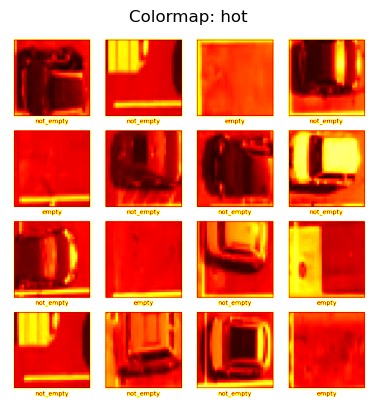

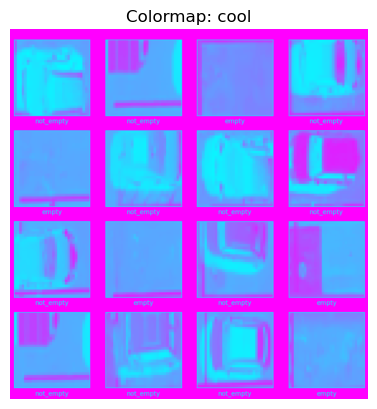

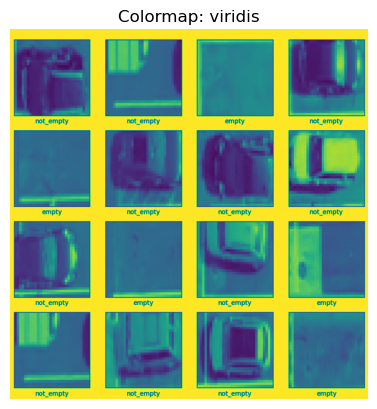

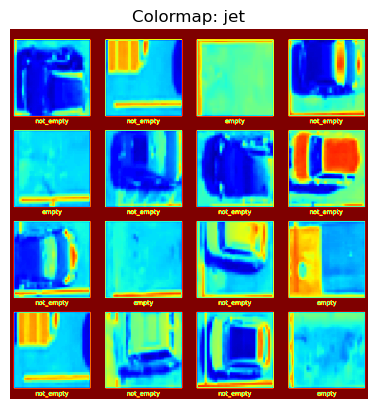

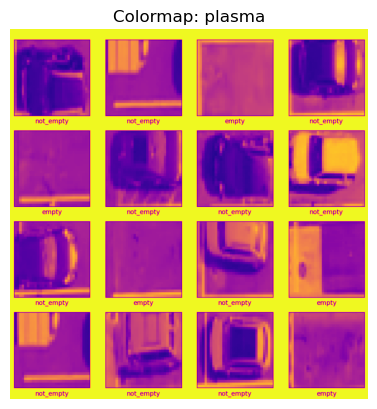

In [7]:
# Read the image using OpenCV
image = cv2.imread('image4.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Function to display the image with a given colormap
def display_image_with_colormap(image, colormap):
    plt.imshow(image, cmap=colormap)
    plt.axis('off')  # Hide axes
    plt.title(f'Colormap: {colormap}')
    plt.show()

# Display the grayscale image with different colormaps
colormaps = ['hot', 'cool', 'viridis', 'jet', 'plasma']
for cmap in colormaps:
    display_image_with_colormap(gray_image, cmap)

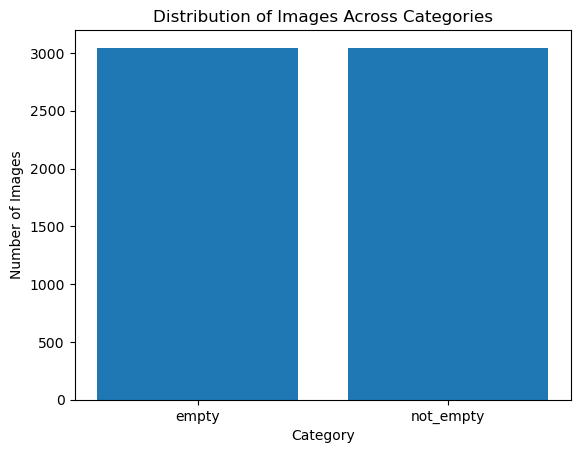

In [8]:
def plot_distribution(labels, categories):
    unique, counts = np.unique(labels, return_counts=True)
    plt.bar(categories, counts)
    plt.xlabel('Category')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Images Across Categories')
    plt.show()

plot_distribution(labels, categories)


Unique image shapes: {(30, 30, 3)}


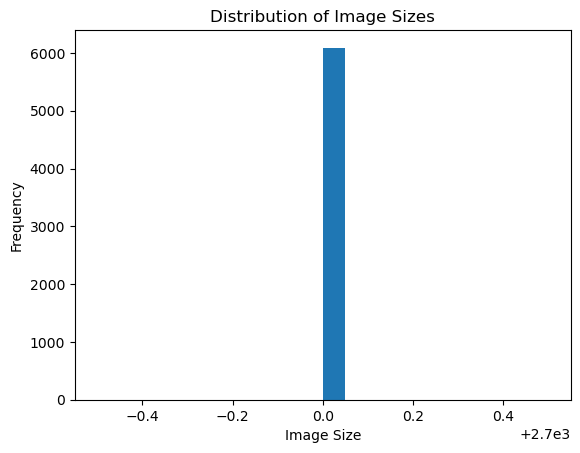

In [9]:
def analyze_image_shapes(images):
    shapes = [img.shape for img in images]
    unique_shapes = set(shapes)
    print(f"Unique image shapes: {unique_shapes}")
    sizes = [img.size for img in images]
    plt.hist(sizes, bins=20)
    plt.xlabel('Image Size')
    plt.ylabel('Frequency')
    plt.title('Distribution of Image Sizes')
    plt.show()

analyze_image_shapes(images)


Mean pixel value: 0.3888019298995554
Standard deviation of pixel values: 0.17840170216376042


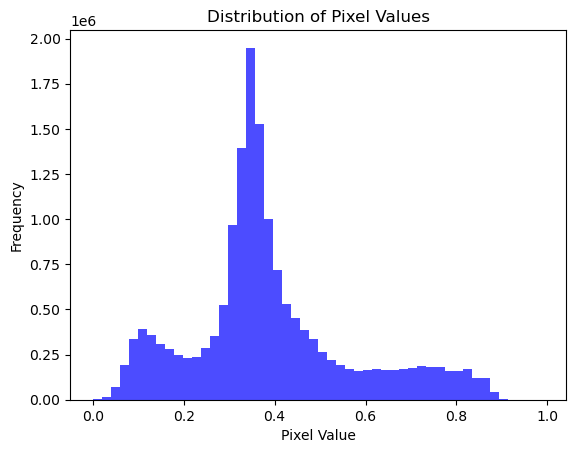

In [10]:
def analyze_pixel_values(images):
    all_pixels = np.concatenate([img.flatten() for img in images])
    mean = np.mean(all_pixels)
    std = np.std(all_pixels)
    print(f"Mean pixel value: {mean}")
    print(f"Standard deviation of pixel values: {std}")

    plt.hist(all_pixels, bins=50, color='blue', alpha=0.7)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title('Distribution of Pixel Values')
    plt.show()

analyze_pixel_values(images)


In [11]:
data = np.asarray(data)
labels = np.asarray(labels)
images = np.asarray(images)

In [12]:
# train / test split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

In [13]:
def display_examples(class_names, images, labels):
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

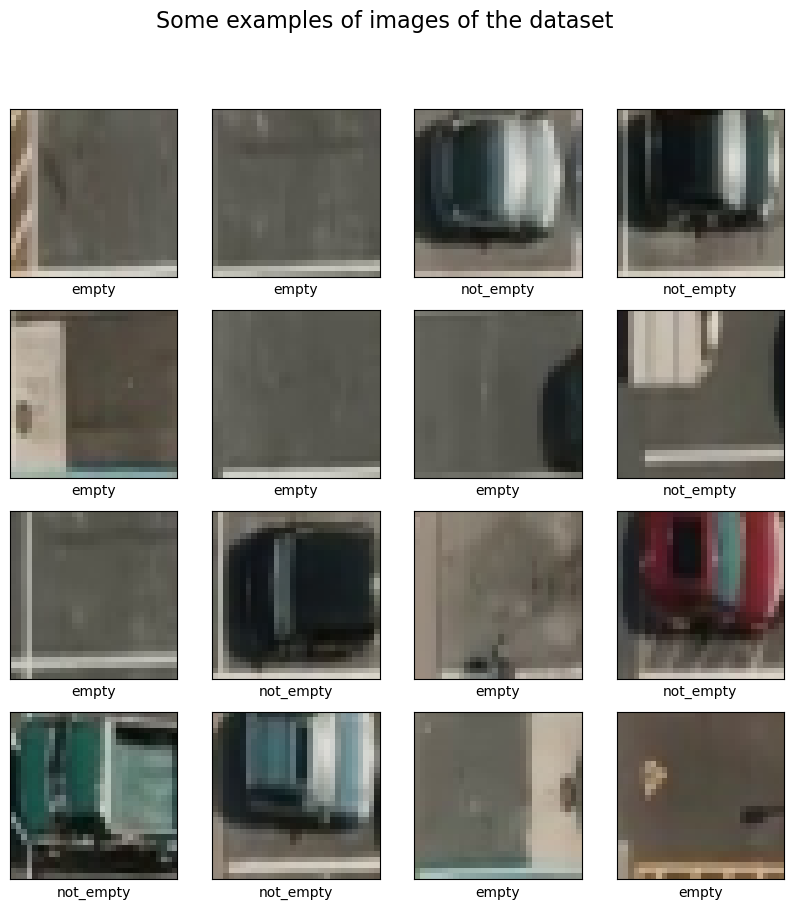

In [14]:
imagg = x_train.reshape((x_train.shape[0],30,30,3))
display_examples(categories, imagg, y_train)

# SVC

In [15]:
# train classifier
classifier = SVC()
parameters = [{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}]
grid_search = GridSearchCV(classifier, parameters)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}])

In [16]:
# test performance
best_estimator = grid_search.best_estimator_
y_prediction = best_estimator.predict(x_test)
score = accuracy_score(y_prediction, y_test)
print('{}% of samples were correctly classified'.format(str(score * 100)))

100.0% of samples were correctly classified


In [17]:
def display_test(class_names, images, true_labels, test_labels):
    fig = plt.figure(figsize=(14,14))
    fig.suptitle("Some examples of images of the test set", fontsize=16)
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(f"True Label : {class_names[true_labels[i]]} \n Predicted Label : {class_names[test_labels[i]]}")
    plt.tight_layout()
    plt.show()

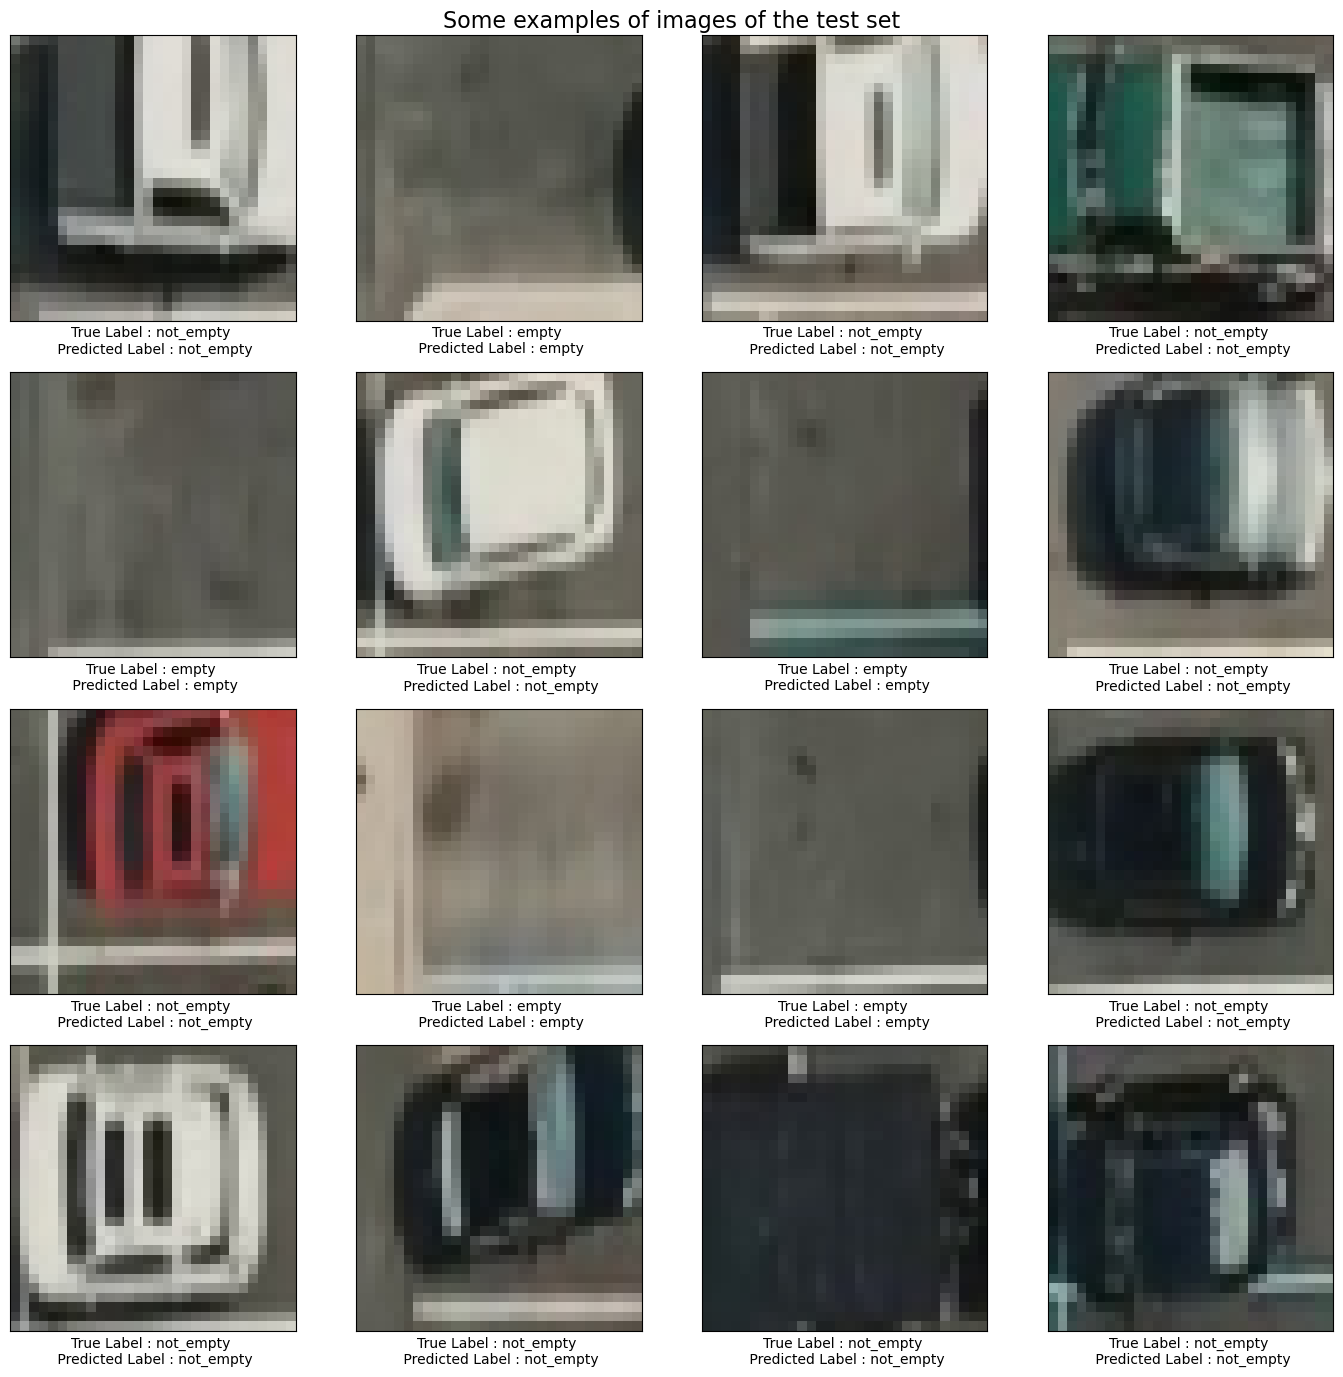

In [18]:
test_imagg = x_test.reshape((x_test.shape[0],30,30,3))
display_test(categories, test_imagg, y_test, y_prediction)

# **CNN**

In [19]:
x_train_CNN = imagg/255
x_test_CNN = test_imagg/255

In [20]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(30,30,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='sigmoid'))

c:\Users\ACER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=1,restore_best_weights=True)
history = model.fit(x_train_CNN,y_train, validation_data=(x_test_CNN,y_test),
                    epochs=20,callbacks=[early_stop])

Epoch 1/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.5116 - loss: 1.0782 - val_accuracy: 0.5000 - val_loss: 0.6916
Epoch 2/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6876 - loss: 0.6070 - val_accuracy: 0.8637 - val_loss: 0.4629
Epoch 3/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8753 - loss: 0.4310 - val_accuracy: 0.8760 - val_loss: 0.3677
Epoch 4/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9049 - loss: 0.3121 - val_accuracy: 0.9598 - val_loss: 0.1656
Epoch 5/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9726 - loss: 0.1147 - val_accuracy: 0.9787 - val_loss: 0.0811
Epoch 6/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9904 - loss: 0.0439 - val_accuracy: 0.9745 - val_loss: 0.0579


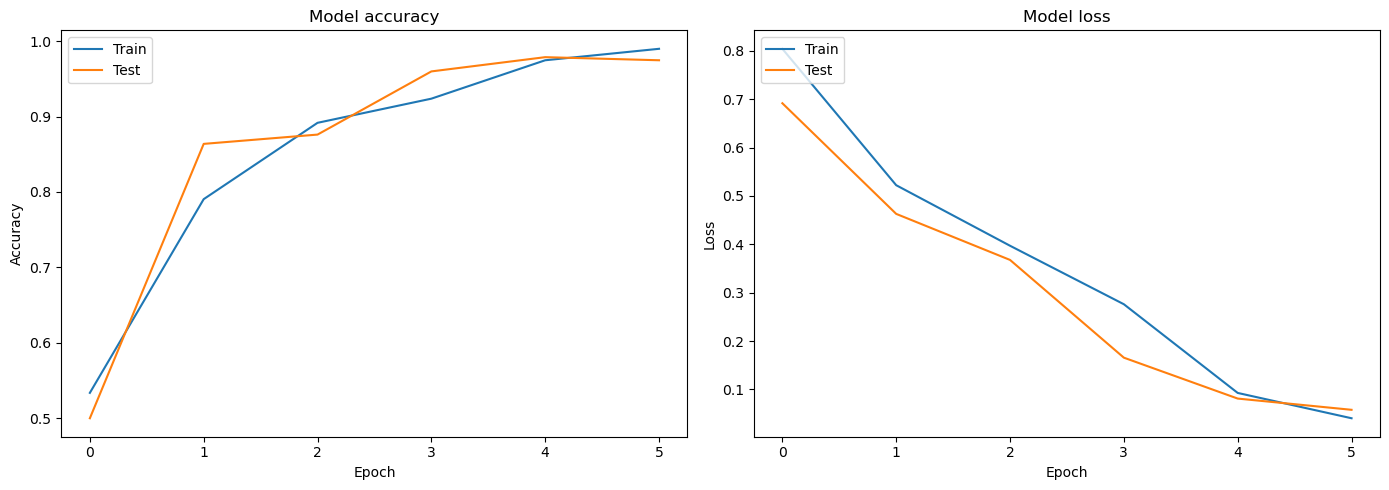

In [22]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# **VIDEO COUNTER**

In [23]:
!pip install opencv-python

In [24]:
from skimage.transform import resize
import numpy as np
import cv2
import matplotlib.pyplot as plt

EMPTY = True
NOT_EMPTY = False

In [25]:
MODEL = best_estimator

In [26]:
def empty_or_not(spot_bgr):

    flat_data = []
    data = []

    img_resized = resize(spot_bgr, (30, 30, 3))
    data.append(img_resized)
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_output = MODEL.predict(flat_data)


    if y_output == 0:
        return EMPTY
    else:
        return NOT_EMPTY

In [27]:
def get_parking_spots_bboxes(connected_components):
    (totalLabels, label_ids, values, centroid) = connected_components

    slots = []
    coef = 1
    for i in range(1, totalLabels):

        # Now extract the coordinate points
        x1 = int(values[i, cv2.CC_STAT_LEFT] * coef)
        y1 = int(values[i, cv2.CC_STAT_TOP] * coef)
        w = int(values[i, cv2.CC_STAT_WIDTH] * coef)
        h = int(values[i, cv2.CC_STAT_HEIGHT] * coef)

        slots.append([x1, y1, w, h])

    return slots

In [28]:
def calc_diff(im1, im2):
    return np.abs(np.mean(im1) - np.mean(im2))
mask = './mask_1920_1080.png'
video_path = './parking_1920_1080_loop.mp4'

In [29]:
mask = cv2.imread(mask, 0)
cap = cv2.VideoCapture(video_path)

In [30]:
connected_components = cv2.connectedComponentsWithStats(mask, 4, cv2.CV_32S)
spots = get_parking_spots_bboxes(connected_components)

In [31]:
spots_status = [None for j in spots]
diffs = [None for j in spots]
previous_frame = None
frame_nmr = 0
ret = True
step = 30
while ret:
    ret, frame = cap.read()

    if frame_nmr % step == 0 and previous_frame is not None:
        for spot_indx, spot in enumerate(spots):
            x1, y1, w, h = spot

            spot_crop = frame[y1:y1 + h, x1:x1 + w, :]

            diffs[spot_indx] = calc_diff(spot_crop, previous_frame[y1:y1 + h, x1:x1 + w, :])

        print([diffs[j] for j in np.argsort(diffs)][::-1])

    if frame_nmr % step == 0:
        if previous_frame is None:
            arr_ = range(len(spots))
        else:
            arr_ = [j for j in np.argsort(diffs) if diffs[j] / np.amax(diffs) > 0.4]
        for spot_indx in arr_:
            spot = spots[spot_indx]
            x1, y1, w, h = spot

            spot_crop = frame[y1:y1 + h, x1:x1 + w, :]

            spot_status = empty_or_not(spot_crop)

            spots_status[spot_indx] = spot_status

    if frame_nmr % step == 0:
        previous_frame = frame.copy()

    for spot_indx, spot in enumerate(spots):
        spot_status = spots_status[spot_indx]
        x1, y1, w, h = spots[spot_indx]

        if spot_status:
            frame = cv2.rectangle(frame, (x1, y1), (x1 + w, y1 + h), (0, 255, 0), 2)
        else:
            frame = cv2.rectangle(frame, (x1, y1), (x1 + w, y1 + h), (0, 0, 255), 2)

    cv2.rectangle(frame, (80, 20), (550, 80), (0, 0, 0), -1)
    cv2.putText(frame, 'Available spots: {} / {}'.format(str(sum(spots_status)), str(len(spots_status))), (100, 60),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    cv2.namedWindow('frame', cv2.WINDOW_NORMAL)
    cv2.imshow('frame', frame)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

    frame_nmr += 1

cap.release()
cv2.destroyAllWindows()

[7.591036414565821, 7.32528180354268, 7.1615858737298055, 7.014159586873248, 6.439095928226351, 6.401851851851859, 6.110378634212296, 6.088122605363992, 6.0571895424836555, 5.906423331544119, 5.861111111111114, 5.743794769282033, 5.742295518907213, 5.624070317782298, 5.597826086956523, 5.5755772005772, 5.574183006535947, 5.572663139329805, 5.556302521008391, 5.540896218557393, 5.507366035292208, 5.419623521572547, 5.369315342328846, 5.301759834368532, 5.296618357487915, 5.263235294117649, 5.246798029556643, 5.236392914653791, 5.215059137098109, 5.198951994590942, 5.186162870945481, 5.165307971014485, 5.131535947712422, 5.116801893171058, 5.0926015085861, 5.053117380703583, 5.027260179434094, 5.019162640901769, 4.948275862068954, 4.9243156199678, 4.918242296918777, 4.901328273244786, 4.896881287726359, 4.754267310789061, 4.750700280112056, 4.7482492997198875, 4.736815415821496, 4.654303599374032, 4.6359477124183, 4.6250862663906105, 4.598200899550221, 4.5933123249299825, 4.5865905431122

In [32]:
spot_crops

NameError: name 'spot_crops' is not defined